### Importing Libraries


In [111]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset & Extracting Features

In [112]:

dis_train = pd.read_csv('../../../data/dateset1/Training.csv')
dis_test = pd.read_csv('../../../data/dateset1/Testing.csv')
X_train = dis_train.iloc[:, :-1].values
y_train = dis_train.iloc[:, -1].values
X_test = dis_test.iloc[:, :-1].values
y_test = dis_test.iloc[:, -1].values


### Model Training & Predicting

In [113]:
from sklearn.svm import SVC
clf = SVC(C=3, kernel='poly', degree=5, gamma=0.1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Model Evalaution

In [114]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print()
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred))

1.0



### Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score
cVal = 10

In [116]:

score = cross_val_score(clf, X_train, y_train,cv=cVal)
print(score) 
print(score.mean()) 


[0.95934959 0.95121951 0.93902439 0.94715447 0.94715447 1.
 1.         1.         1.         1.        ]
0.974390243902439


### HyperParameter Tuning


In [117]:
# from sklearn.model_selection import GridSearchCV
# # clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=5)
# param_grid = {'C':list(range(0,10)),
#                'kernel' : ['poly'],
#                'degree' : list(range(0,7))
#                }

# grid_search = GridSearchCV(SVC(), param_grid, cv=cVal)
# grid_search.fit(X_train, y_train)

In [118]:
# pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [119]:
# grid_search.best_params_

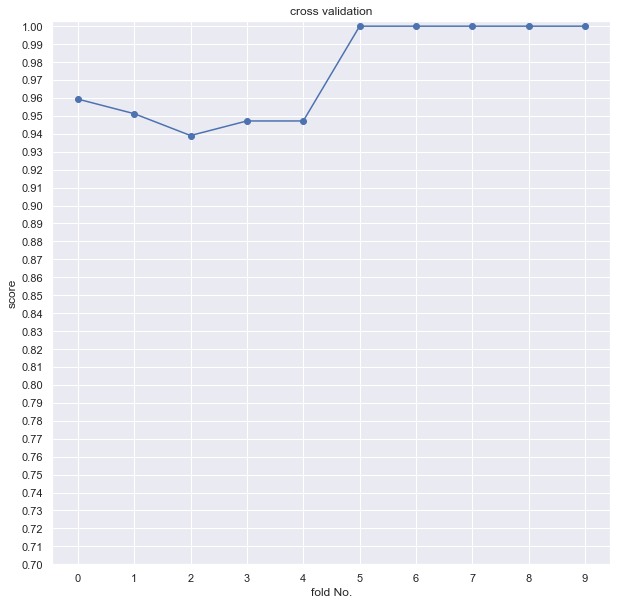

In [120]:
plt.figure(figsize=(10, 10))
plt.plot(range(0,cVal), score)
plt.scatter(range(0,cVal), score)


plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0.7, 1, 0.01))

plt.show()

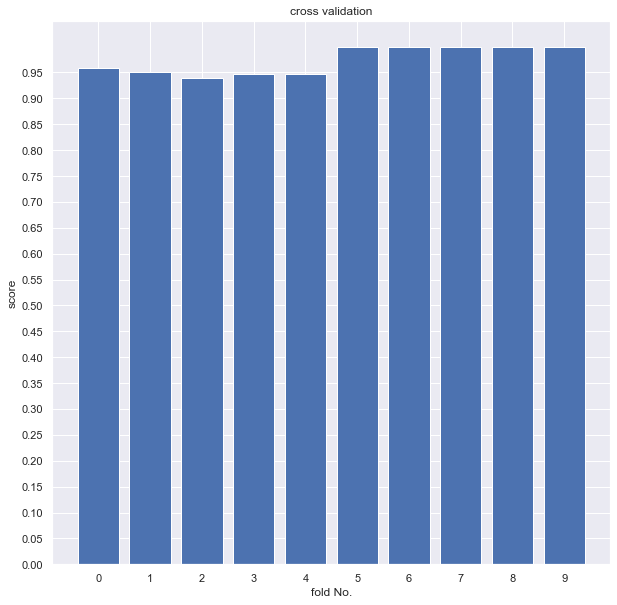

In [121]:
plt.figure(figsize=(10, 10))
plt.bar(range(0,cVal), score)
# plt.plot(range(0,20), scores)

plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0, 1, 0.05))

plt.show()